# Coursera ML Exercise 1

In [1]:
%matplotlib inline
import numpy as np
from matplotlib import pyplot as plt
import pandas
import os

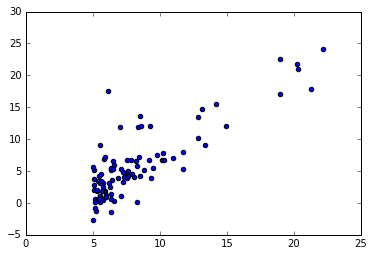

In [2]:
data_food_trucks = pandas.read_table("ex1data1.txt", sep = ',', header=None, names=['population', 'profit'])

pop, profit = data_food_trucks.population, data_food_trucks.profit

plt.scatter(pop, profit)
plt.show()

In [3]:
X = pop.as_matrix()
X = np.vstack((np.ones(len(X)), X))
y = profit.as_matrix()

In [4]:
theta = np.zeros(2)

iterations = 1500
alpha = 0.01

### 2.2.3 Computing the cost $J(\theta)$

Cost function given as:

$$\large J(\theta) = \frac{1}{2m}\sum_{i=1}^{m} \big( h_{\theta}(x^{(i)}) - y^{(i)} \big)^2  $$

Where hypothesis function is $$ \large h_{\theta}(x) = \theta^{T}x = \theta_0 + \theta_{1}x_1 $$

In [5]:
def computeCost(X, y, theta):
    """Computes cost function for given data X and y and parameters theta.
    Implemented using numpy matrix multiplication
    """
    m = len(y)
    h_theta = np.dot(theta.T, X) # vector of all predictions
    J = np.sum((h_theta - y) * (h_theta - y)) / (2*m)
    return J
    

In [6]:
computeCost(X, y, theta)

32.072733877455676

### 2.2.4 Gradient Descent

Update equation given as:

$$ \large \theta_j := \theta_j - \alpha\frac{1}{m}\sum_{i=1}^{m} \big( h_{\theta}(x^{(i)} - y^{(i)} \big) x_{j}^{(i)}  $$

(We're summing each difference times each $x^{(i)}$ for each row $j$ (for each feature). Essentially it's the same as summing elements of the vector equal to the element-wise product of the difference and the $j$-th row of $x$)

In [7]:
def updateParams(X, y, alpha, theta):
    """Given an old theta vector, computes and returns an updated theta vector"""
    new_theta = np.zeros_like(theta) # initialize new theta vector
    for j in range(len(new_theta)):
        m = len(y)
        h_theta = np.dot(theta.T, X) # vector of all predictions
        new_theta[j] = theta[j] - (alpha/m) * np.sum((h_theta - y) * X[j])
    return new_theta
        

In [8]:
def gradient_descent(X, y, alpha, iterations=1500):
    """Performs gradient descent on training examples y and features X,
    with learning rate alpha and some number of iterations. Returns output
    theta, where theta is a vector of length X.rows. """
    theta = np.zeros(X.shape[0]) # number of rows in X. 
    for i in range(iterations):
        theta = updateParams(X, y, alpha, theta)
    return theta

In [9]:
model = gradient_descent(X, y, alpha, iterations)

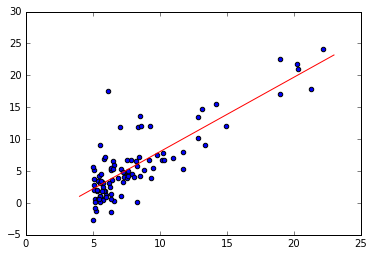

In [14]:
plt.scatter(pop, profit)
plot_x = np.linspace(4, 23, 1000)
plot_y = np.apply_along_axis(lambda x: model[0] + model[1] * x, 0, plot_x)
plt.plot(plot_x, plot_y, color = 'red')
plt.show()